In [79]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage

In [80]:
# run_list = ['00177', '00179', '00178', '00175']
run_list = ['00188']


for run in run_list:
    def CutCondition(waveform):  
        FirstPeak_area = sum(waveform[:15])
        SecondPeak_area = sum(waveform[15:])    
        if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
            return(True)
        else:
            return(False)
        
#     def PrintWaveform(waveform,i):
    
#         fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,sharex=False, figsize=(30, 5))
#         ax1.plot(waveform[i])
#         ax2.plot(waveform[i+1])
#         ax3.plot(waveform[i+2])
#         ax4.plot(waveform[i+3])
#         ax5.plot(waveform[i+4])
#         ax6.plot(waveform[i+5])
#         ax7.plot(waveform[i+6])
#         plt.show()

    def PrintWaveform(waveform,i):
    
        fig, ax1 = plt.subplots(1,1,sharex=False, figsize=(12, 3.5))
        ax1.plot(waveform[i])
        plt.show()

    
    def S2_found(integral, width):
        #maximum_S2 = max(waveform)
        if integral > 500 and width >200 and width < 2000:
            return True
        else:
            return False

    
    def Process(waveform, i): 
        SelectionCutFlag = CutCondition(waveform[i])
        if SelectionCutFlag == True:
            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 45000
            while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
                j += 1
                counter_timestamp = timestamp[i+j]
            else:
                if S2_found(integral = integral[i+j], width = width[i+j]):

                    kr_s2_area.append(integral[i+j]) 
                    kr_s1_area.append(integral[i])
                        
                    kr_s2_width.append(width[i+j]) 
                    kr_s1_width.append(width[i])
                        
                    Kr_s2_area_bot.append(area_per_channel[i+j][0])
                    Kr_s1_area_bot.append(area_per_channel[i][0])
                    
                    kr_s2_area_all_corrected.append(integral[i+j])
                    kr_s1_area_all_corrected.append(integral[i])
                    kr_s1_width_all_corrected.append(width[i])
                    kr_s2_area_bottom_corrected.append(area_per_channel[i+j][0])
                    kr_s1_area_bottom_corrected.append(area_per_channel[i][0])

                    
                    for m in range(len(PMT_S1_area_list)):
                        if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                        and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                        and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                        and area_per_channel[i+j][7] > 0 \
                        :
                            
#                             kr_s2_area_all_corrected.append(integral[i+j])
#                             kr_s1_area_all_corrected.append(integral[i])
#                             kr_s1_width_all_corrected.append(width[i])
#                             kr_s2_area_bottom_corrected.append(area_per_channel[i+j][0])
#                             kr_s1_area_bottom_corrected.append(area_per_channel[i][0])
                            
                            PMT_S1_area_list[m].append(area_per_channel[i][m+1])
                            PMT_S2_area_list[m].append(area_per_channel[i+j][m+1])

                                
                    return
                else:
                    return

    ctx = straxbra.XebraContext()

    peaks_data = ctx.get_array(run, 'peaks')
    waveform = peaks_data['data']
    risetime = -peaks_data['area_decile_from_midpoint'][:,1]
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    timestamp = peaks_data['time']
    area_per_channel = peaks_data['area_per_channel']

                                                        
    kr_s2_area = []
    kr_s1_area = []
    kr_s2_width = []
    kr_s1_width = []
    Kr_s2_area_bot = []
    Kr_s1_area_bot = []
    kr_s2_area_all_corrected = []
    kr_s2_area_bottom_corrected = []
    kr_s1_area_all_corrected = []
    kr_s1_width_all_corrected = []
    kr_s1_area_bottom_corrected = []
    
    
    Area_s2_PMT1 = []
    Area_s2_PMT2 = []
    Area_s2_PMT3 = []
    Area_s2_PMT4 = []
    Area_s2_PMT5 = []
    Area_s2_PMT6 = []
    Area_s2_PMT7 = []
                                                                 
    Area_s1_PMT1 = []
    Area_s1_PMT2 = []
    Area_s1_PMT3 = []
    Area_s1_PMT4 = []
    Area_s1_PMT5 = []
    Area_s1_PMT6 = []
    Area_s1_PMT7 = [] 

                                                                 
    PMT_S2_area_list = [Area_s2_PMT1, Area_s2_PMT2,Area_s2_PMT3,Area_s2_PMT4,Area_s2_PMT5,Area_s2_PMT6,Area_s2_PMT7]                                                       
    PMT_S1_area_list = [Area_s1_PMT1, Area_s1_PMT2,Area_s1_PMT3,Area_s1_PMT4,Area_s1_PMT5,Area_s1_PMT6,Area_s1_PMT7]                                                             
    
                                                              
    num = len(waveform)
    print_counter = 0.0
    for i in range(0,num):    
        Process(waveform,i)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0, '        Run ',run, 'done!')
    
    
    


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00188 done!


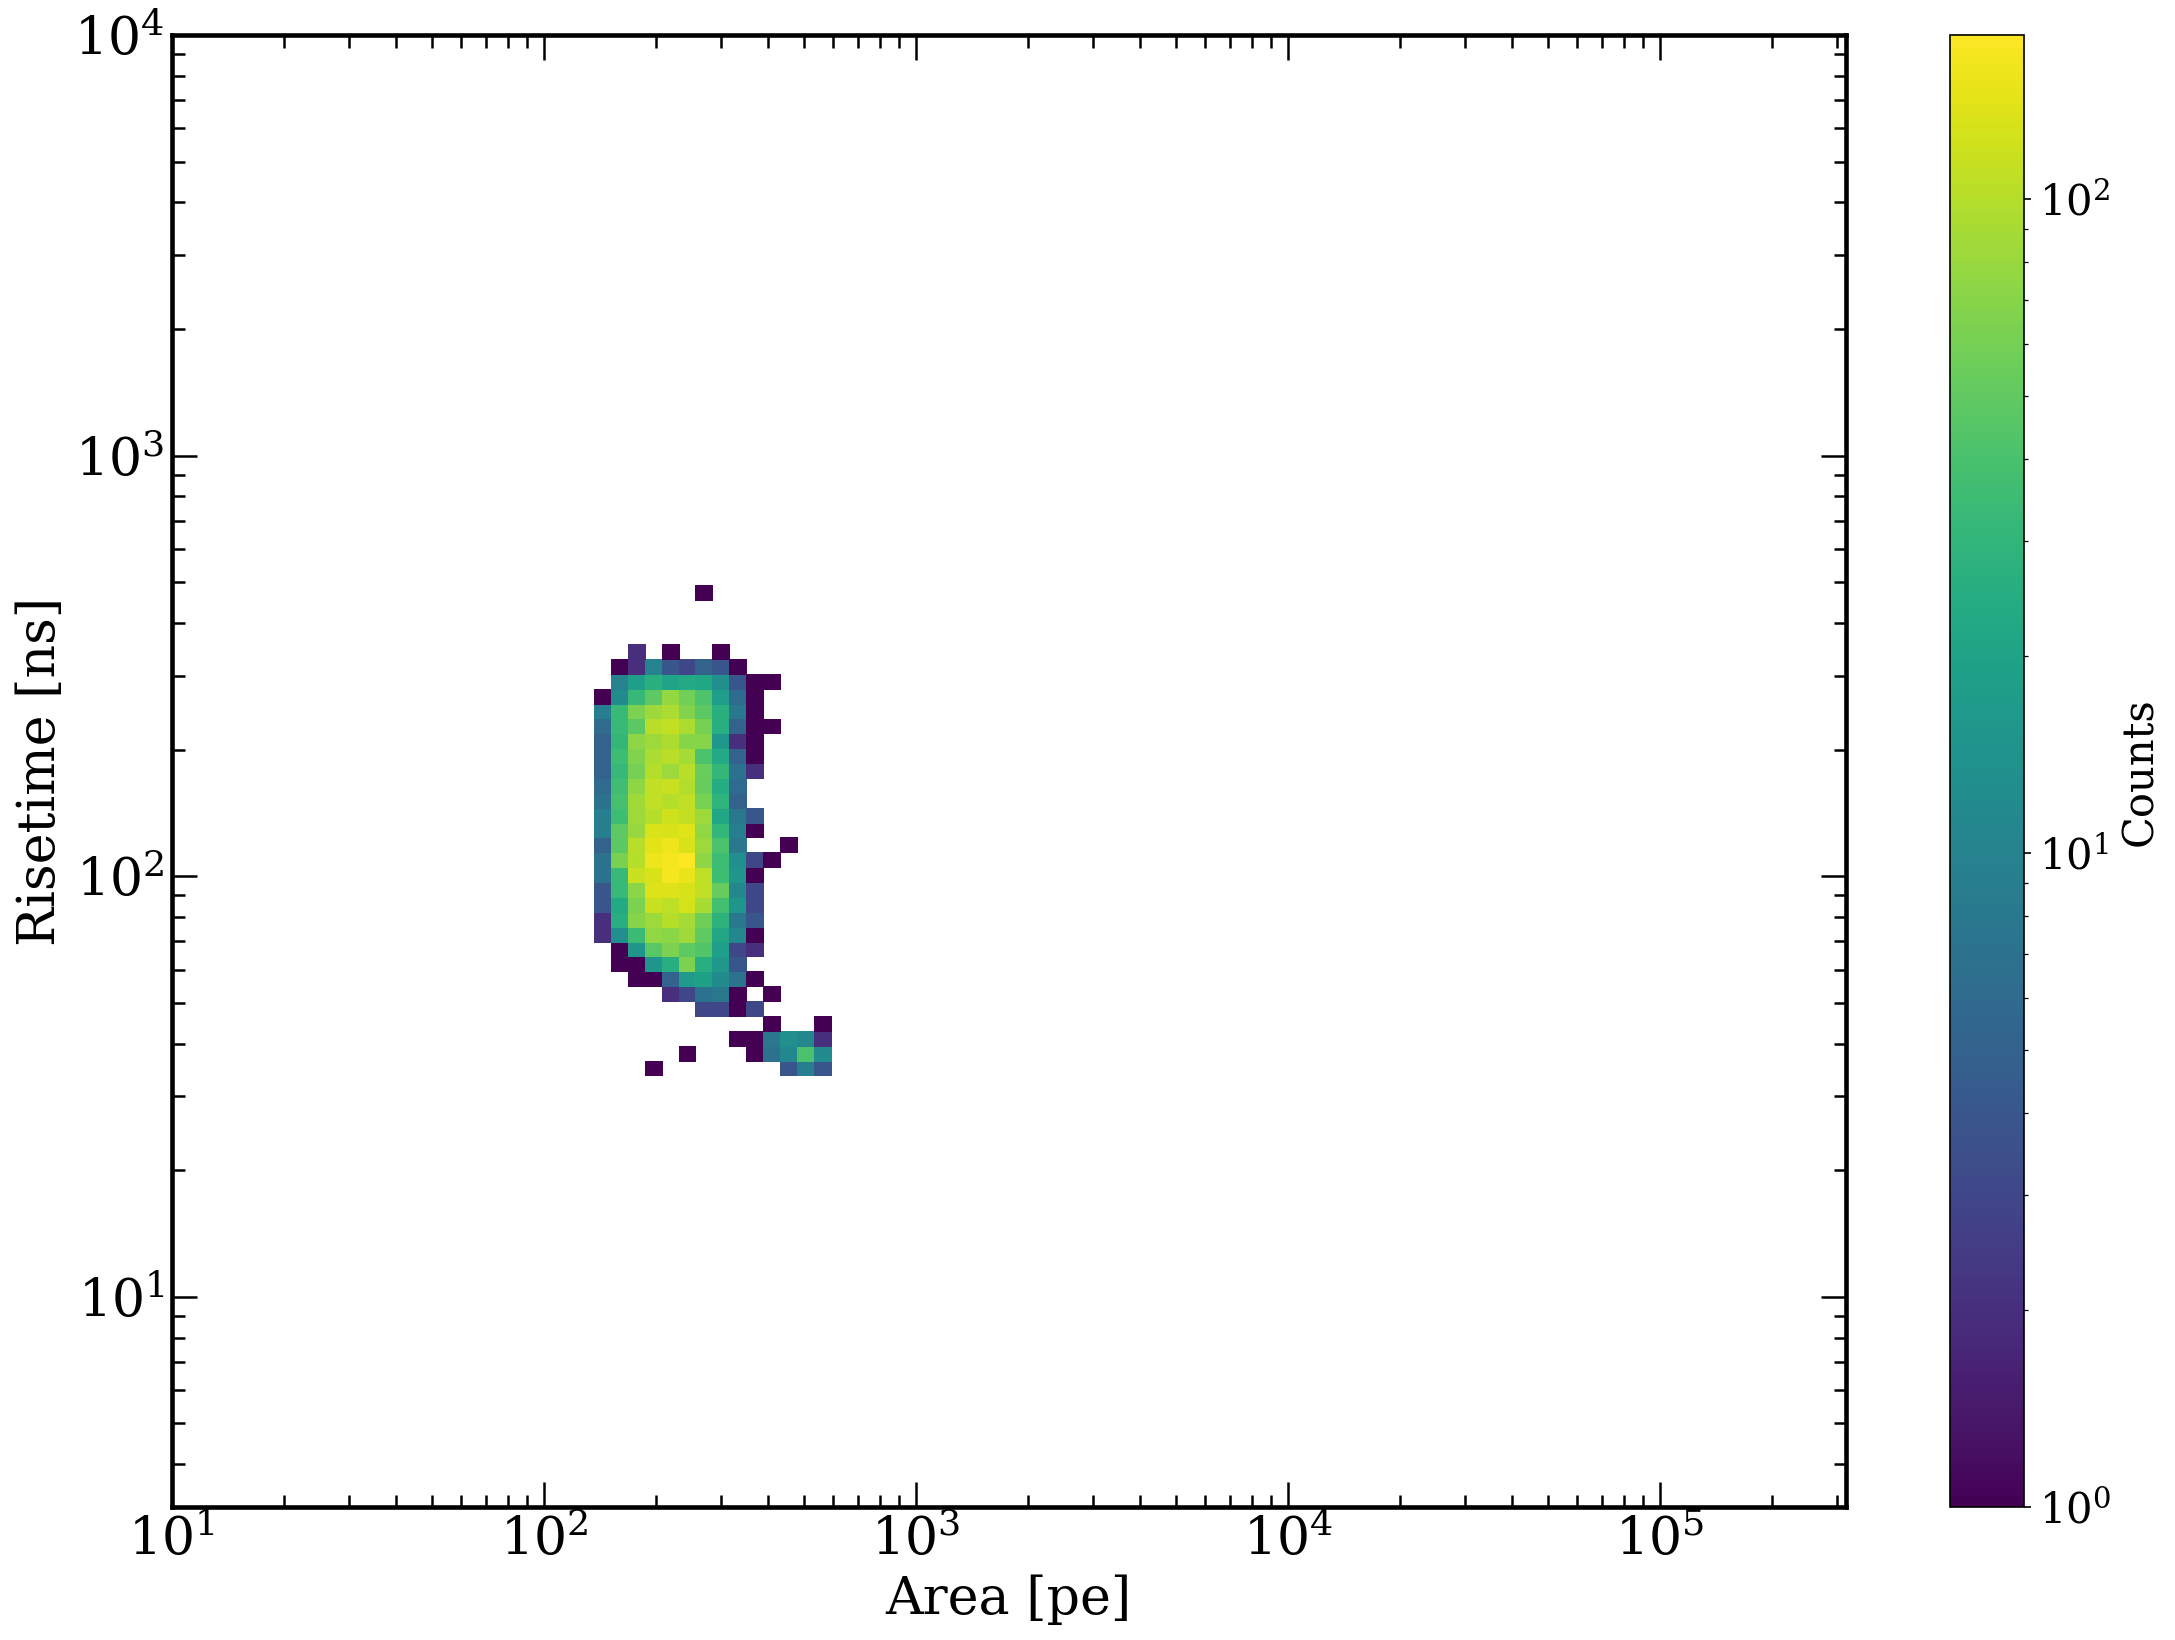

In [81]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

bins_x = np.logspace(1,5.5,100)
bins_y = np.logspace(0.5,4,100)
histo_max= 2*10**3
pS2 = np.array([(3000,200),(20000,600)], dtype=[('area', np.float32), ('rt', np.float32)])
p41 = np.array([(220,30),(400,45)], dtype=[('area', np.float32), ('rt', np.float32)])
p32 = np.array([(150,20),(300,28)], dtype=[('area', np.float32), ('rt', np.float32)])
p09 = np.array([(60,18),(120,28)], dtype=[('area', np.float32), ('rt', np.float32)])

# ax1.plot(p41['area'][[0,1,1,0,0]],p41['rt'][[0,0,1,1,0]], c='r')
# ax1.plot(p32['area'][[0,1,1,0,0]],p32['rt'][[0,0,1,1,0]], c='r')
# ax1.plot(p09['area'][[0,1,1,0,0]],p09['rt'][[0,0,1,1,0]], c='r')


counts, _, _ = np.histogram2d(kr_s1_area_all_corrected, kr_s1_width_all_corrected, bins=(bins_x, bins_y))
im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=LogNorm())
cb = plt.colorbar(im, ax=axes, label='Counts/bin')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('Area [pe]')
axes.set_ylabel('Risetime [ns]')

SIZE = 20
EXTRA_SIZE = 30


plt.show()


In [82]:
print(len(kr_s2_area))
print(len(kr_s2_area_corrected))

10055
4816


/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


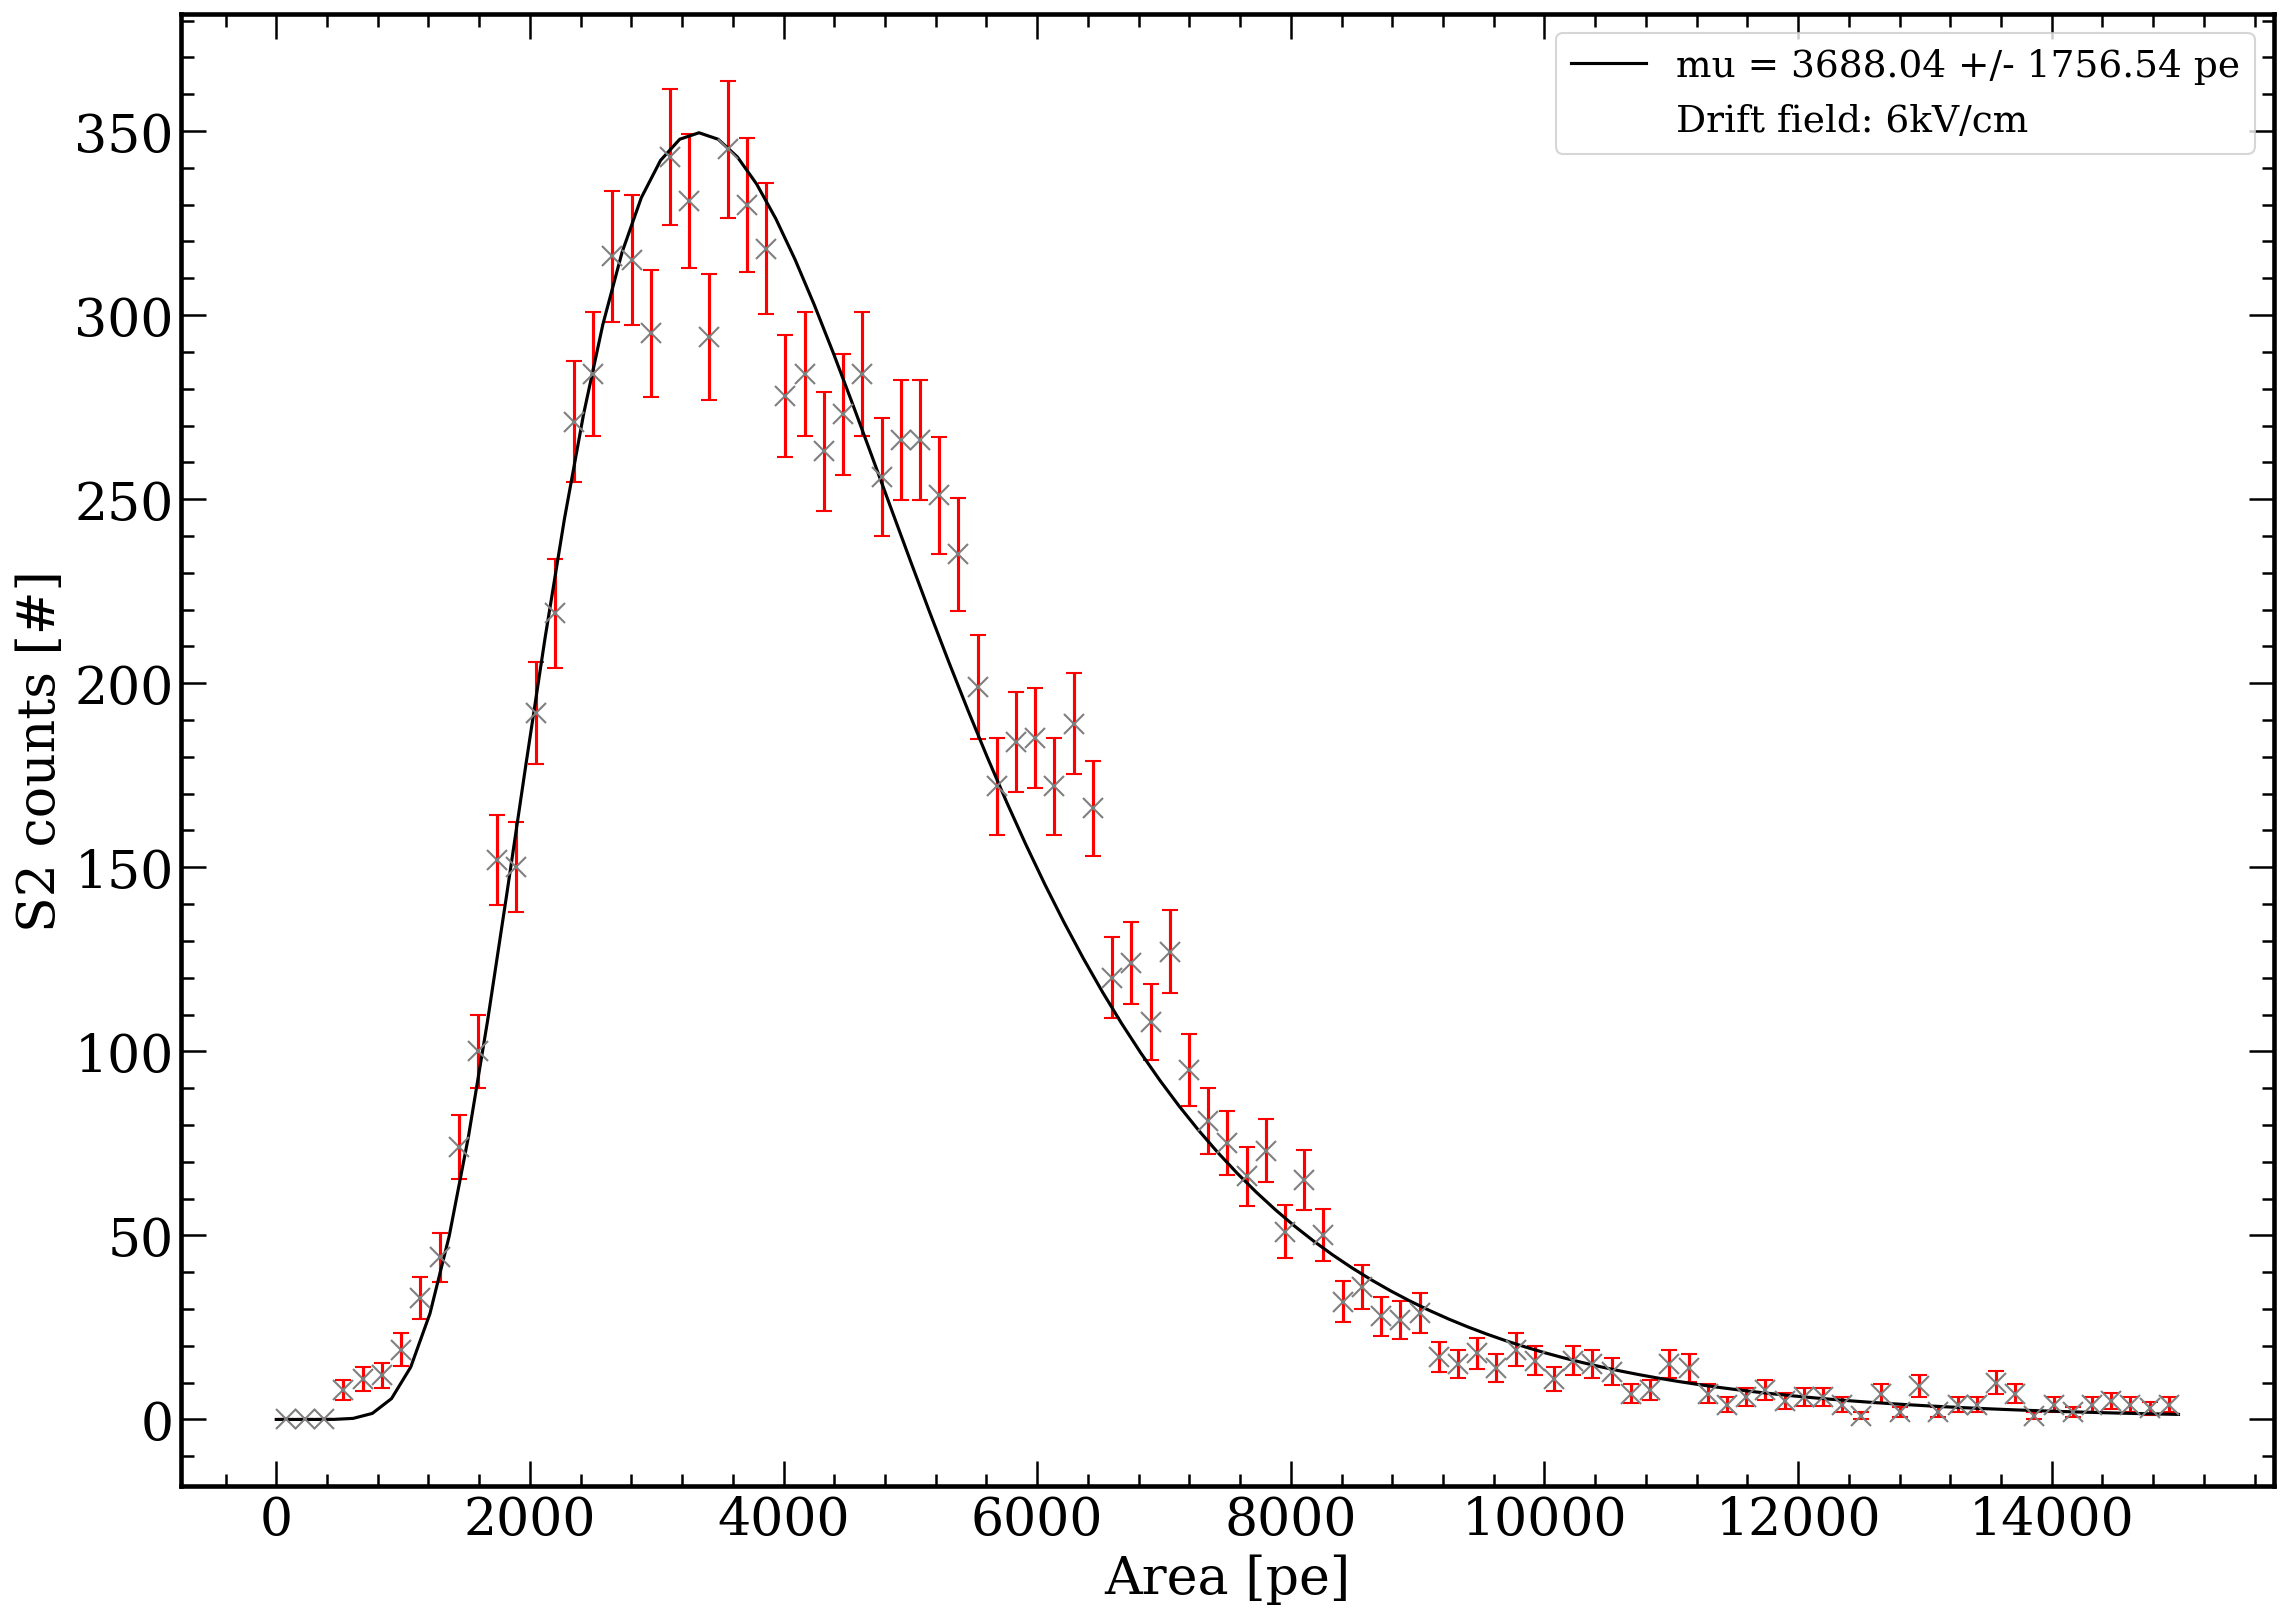

In [83]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus
p0 = [10,10,10]
x_range = np.linspace(0, 15000,100)
counts, binEdges = np.histogram(kr_s2_area, bins=x_range)
bincenters= 0.5 * (binEdges[1:] + binEdges[:-1])
popt, pcov = curve_fit(single_gaus, bincenters, counts, p0,  sigma=np.maximum(np.sqrt(counts), np.ones_like(counts)))

S2_mu = np.exp(popt[1]+((popt[2]**2)/2))
S2_mu_str = "%.2f" % S2_mu
S2_sigma = np.exp(popt[1]+((popt[2]**2)/2))    * np.sqrt(np.exp(popt[2]**2)-1)
S2_sigma_str = "%.2f" % S2_sigma


plt.errorbar(bincenters, counts, yerr=np.sqrt(counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
axes.plot(x_range,single_gaus(x_range,*popt), color = 'k', label = 'mu = '+str(S2_mu_str)+ ' +/- '+str(S2_sigma_str)+' pe')
axes.plot([], [], ' ', label="Drift field: 6kV/cm")
axes.set_xlabel('Area [pe]')
axes.set_ylabel('S2 counts [#]')
axes.legend(loc = 1,prop={'size': 18})
plt.show()

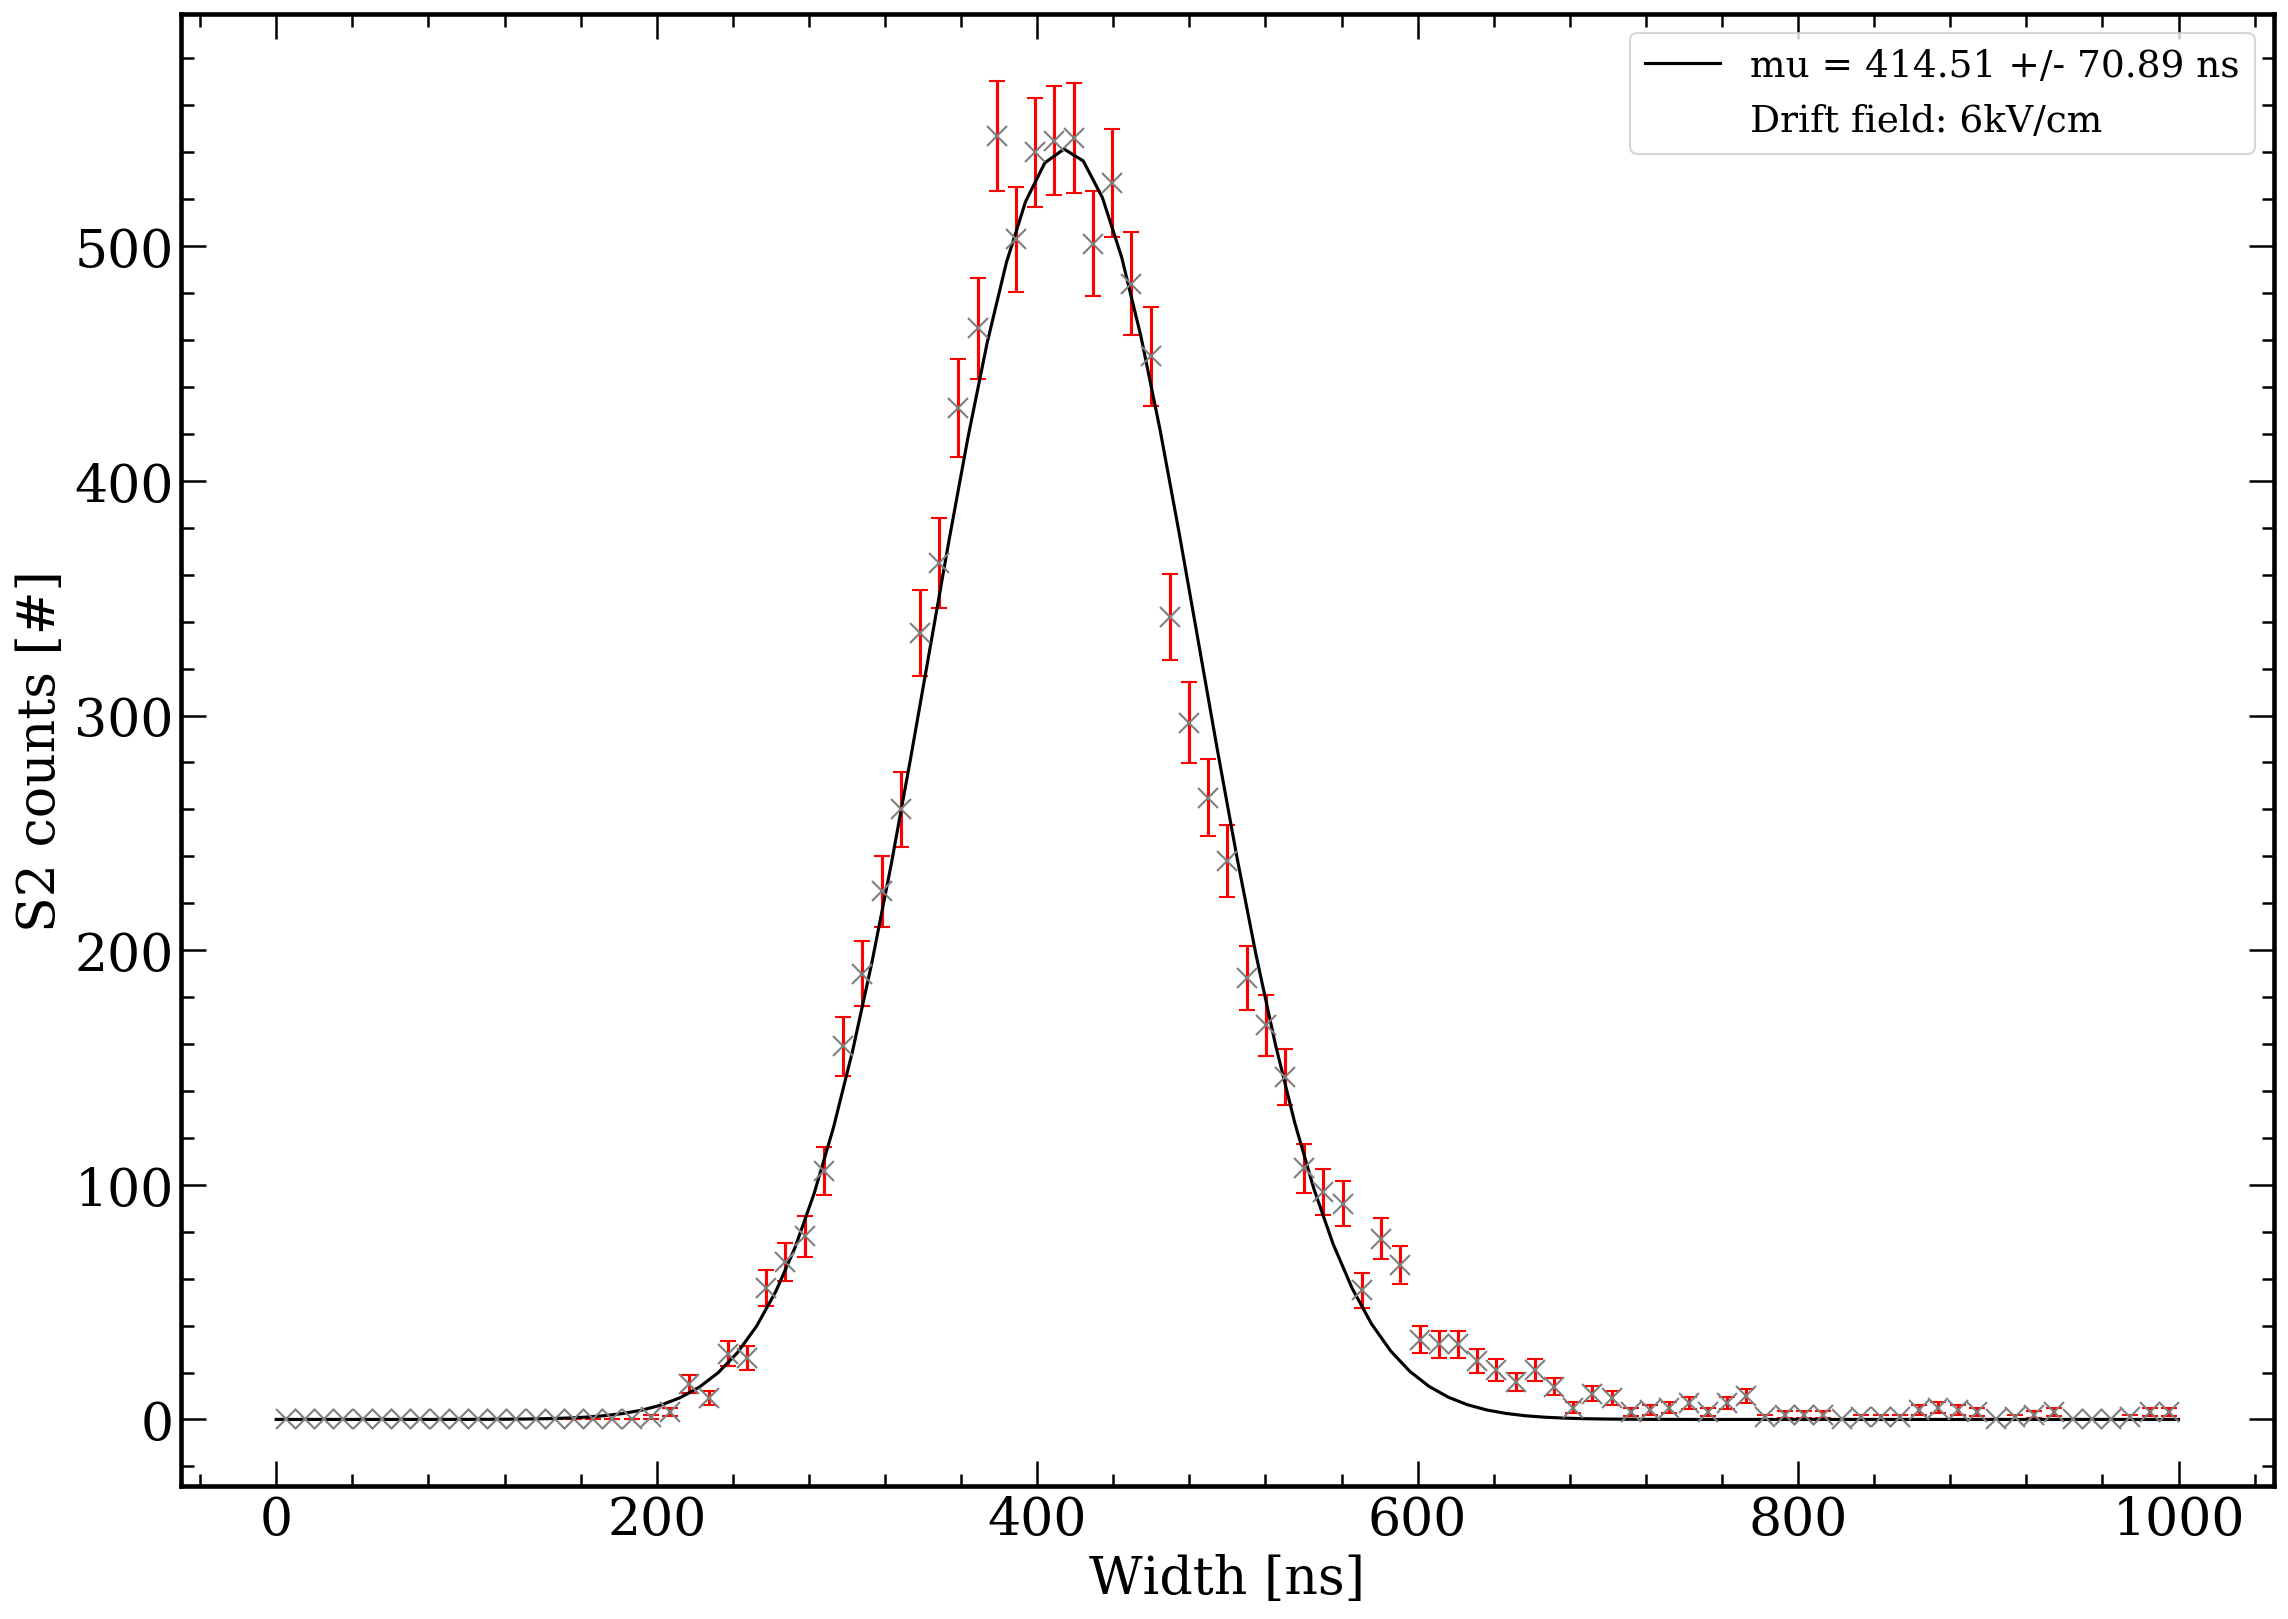

In [84]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus
p0 = [500,500,50]
x_range = np.linspace(0, 1000,100)
counts, binEdges = np.histogram(kr_s2_width, bins=x_range)
bincenters= 0.5 * (binEdges[1:] + binEdges[:-1])
popt, pcov = curve_fit(single_gaus, bincenters, counts, p0,  sigma=np.maximum(np.sqrt(counts), np.ones_like(counts)))

S2_mu = popt[1]
S2_mu_str = "%.2f" % S2_mu
S2_sigma = popt[2]
S2_sigma_str = "%.2f" % S2_sigma


plt.errorbar(bincenters, counts, yerr=np.sqrt(counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
axes.plot(x_range,single_gaus(x_range,*popt), color = 'k', label = 'mu = '+str(S2_mu_str)+ ' +/- '+str(S2_sigma_str)+' ns')
axes.plot([], [], ' ', label="Drift field: 6kV/cm")
axes.set_xlabel('Width [ns]')
axes.set_ylabel('S2 counts [#]')
axes.legend(loc = 1,prop={'size': 18})
plt.show()

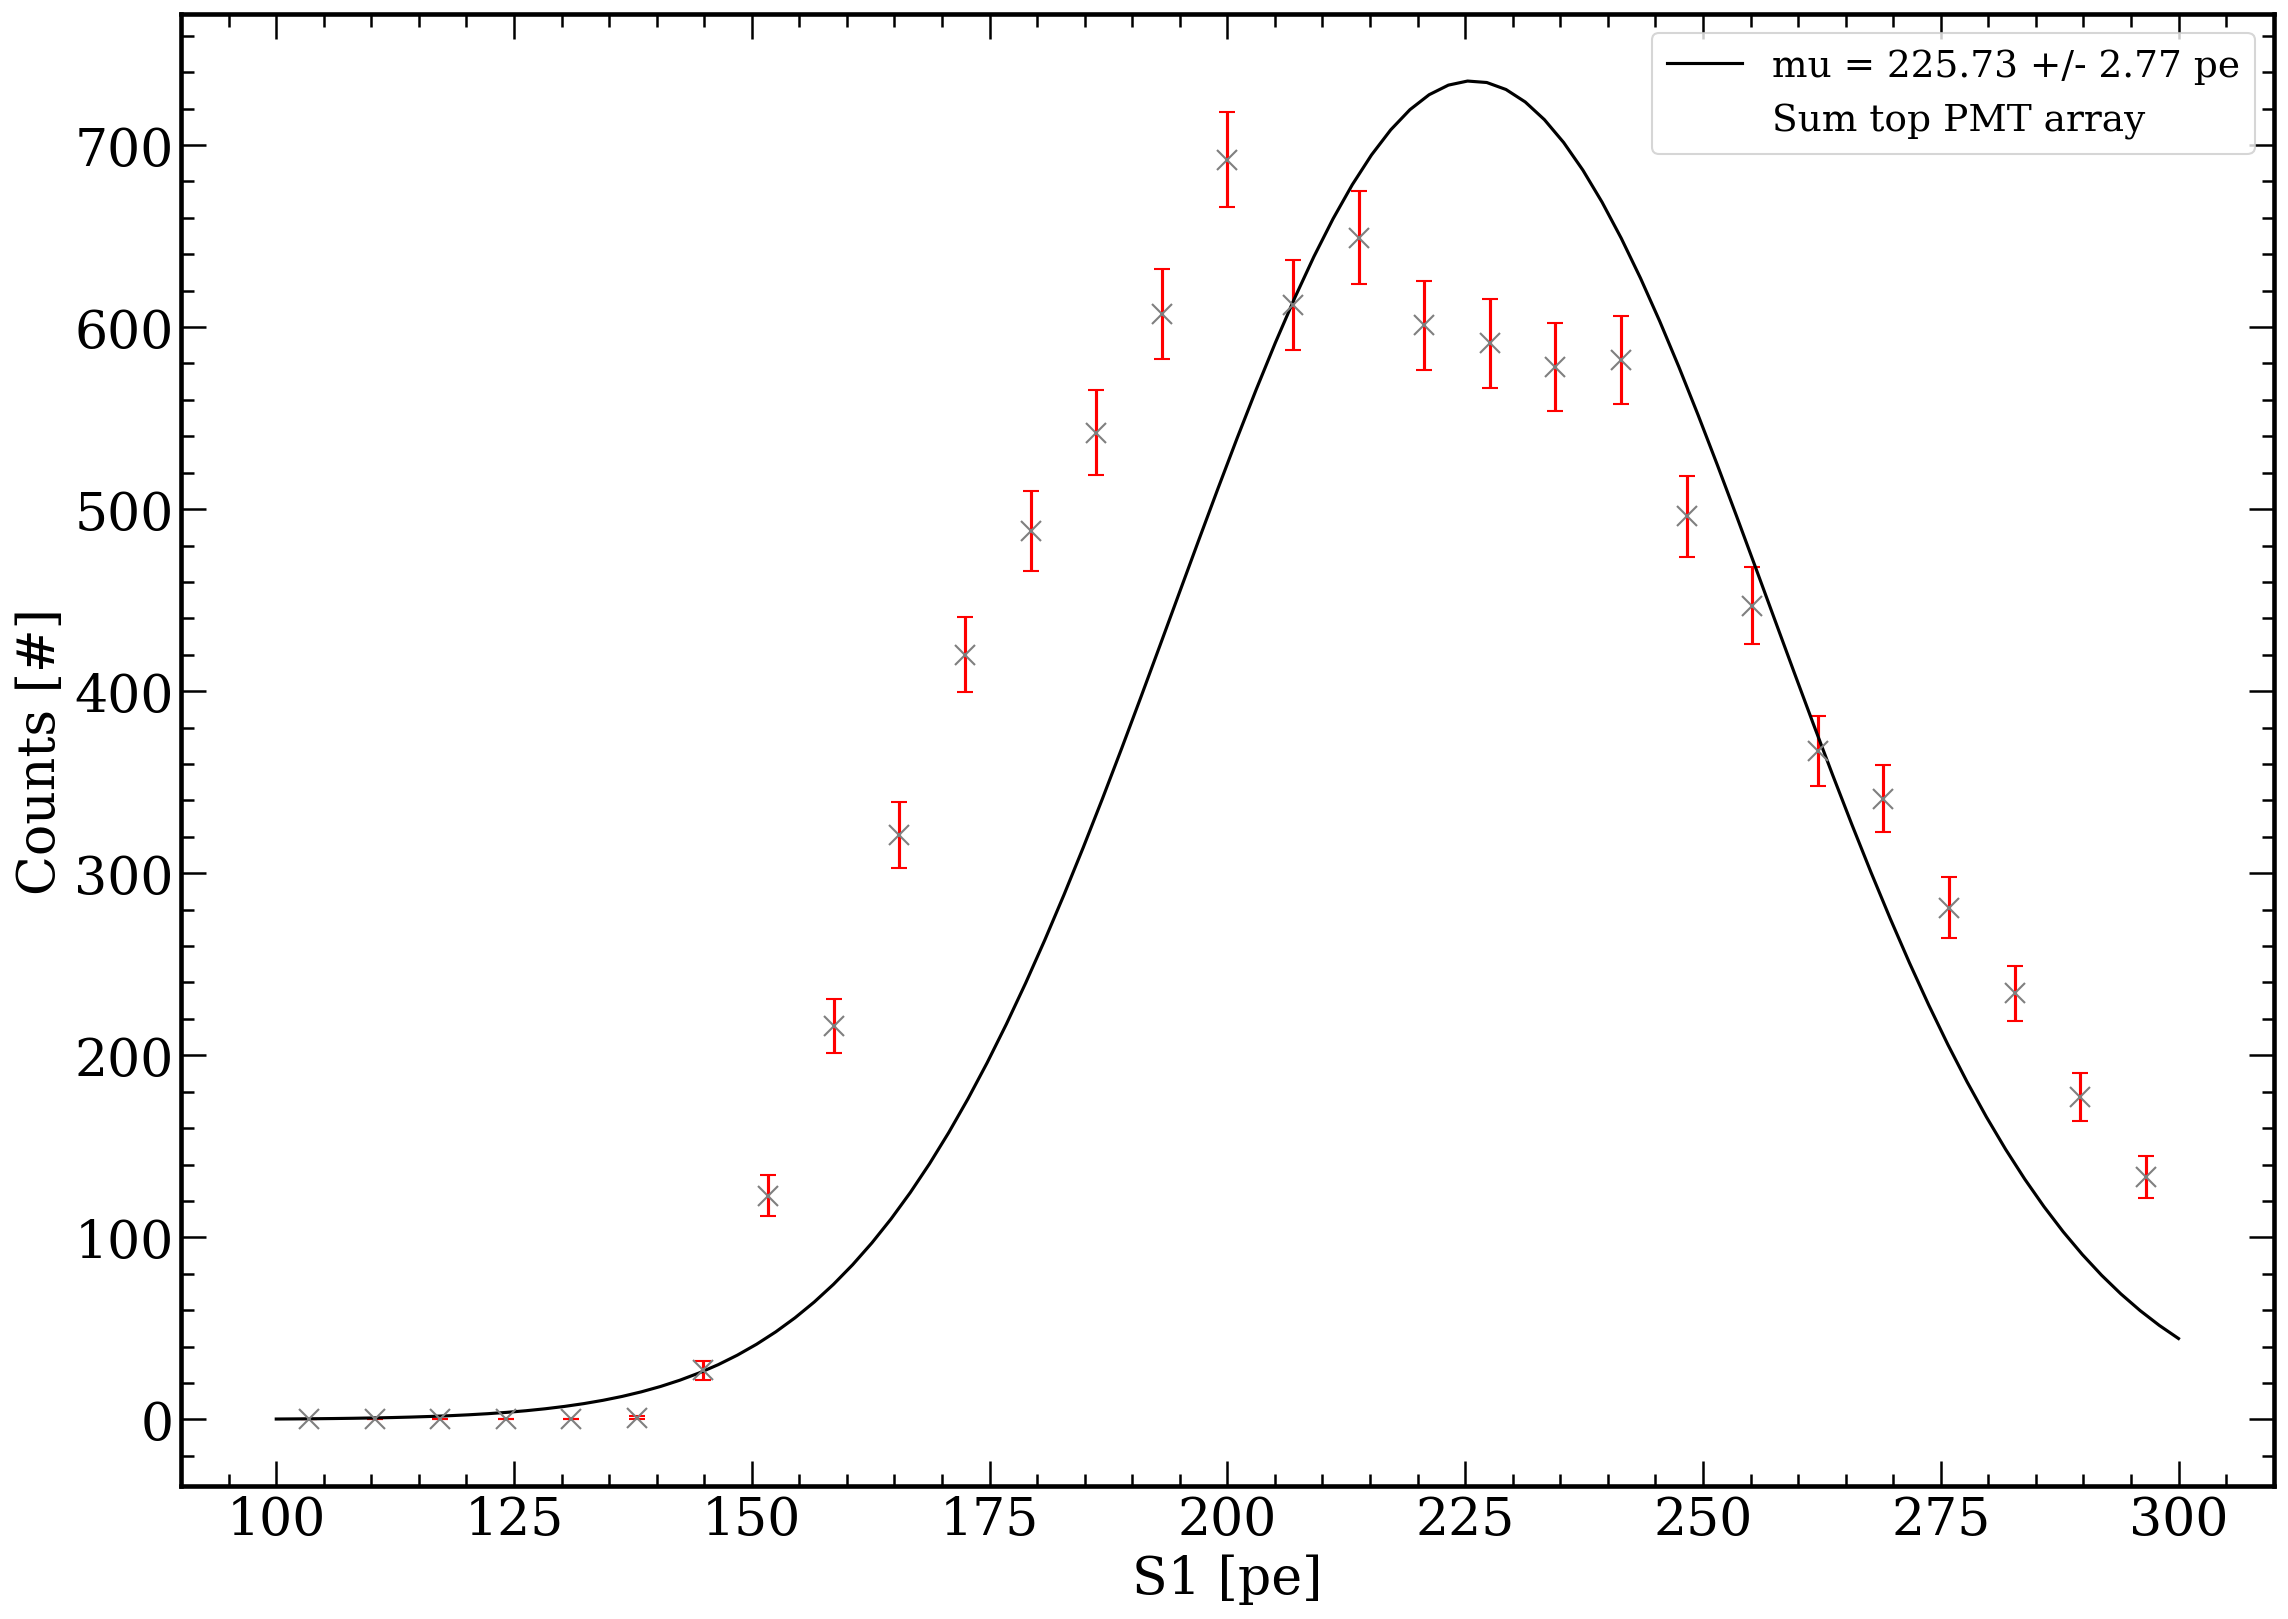

In [85]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus
p0 = [100,70,30]
x_range_all = np.linspace(100, 300,100)

Sum_range_all = np.linspace(100, 300,30)
Sum_counts_all, Sum_binEdges_all = np.histogram(kr_s1_area_all_corrected, bins=Sum_range_all)
Sum_bincenters_all = 0.5 * (Sum_binEdges_all[1:] + Sum_binEdges_all[:-1])

popt_all, pcov = curve_fit(single_gaus, Sum_bincenters_all, Sum_counts_all, p0,  sigma=np.maximum(np.sqrt(Sum_counts_all), np.ones_like(Sum_counts_all)))
perr_all = np.sqrt(np.diag(pcov))
# S2_mu = np.exp(popt[1]+((popt[2]**2)/2))
# S2_mu_str = "%.2f" % S2_mu
# S2_sigma = np.exp(popt[1]+((popt[2]**2)/2))    * np.sqrt(np.exp(popt[2]**2)-1)
# S2_sigma_str = "%.2f" % S2_sigma

mu_all = popt_all[1]
mu_all_str = "%.2f" % mu_all
sigma_all = perr_all[1]
sigma_all_str = "%.2f" % sigma_all
plt.errorbar(Sum_bincenters_all, Sum_counts_all, yerr=np.sqrt(Sum_counts_all), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
axes.plot(x_range_all,single_gaus(x_range_all,*popt_all), color = 'k',label = 'mu = '+str(mu_all_str)+ ' +/- '+str(sigma_all_str)+' pe')
axes.plot([], [], ' ', label = 'Sum top PMT array')








axes.set_xlabel('S1 [pe]')
axes.set_ylabel('Counts [#]')
axes.legend(prop={'size': 18})
plt.show()


In [95]:
sum_s1_area_corrected = [a + b +c+d+e+f+g for a,b,c,d,e,f,g in zip(PMT_S1_area_list[0],PMT_S1_area_list[1],PMT_S1_area_list[2],PMT_S1_area_list[3],PMT_S1_area_list[4],PMT_S1_area_list[5],PMT_S1_area_list[6])]
sum_s2_area_corrected = [a + b +c+d+e+f+g for a,b,c,d,e,f,g in zip(PMT_S2_area_list[0],PMT_S2_area_list[1],PMT_S2_area_list[2],PMT_S2_area_list[3],PMT_S2_area_list[4],PMT_S2_area_list[5],PMT_S2_area_list[6])]

/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


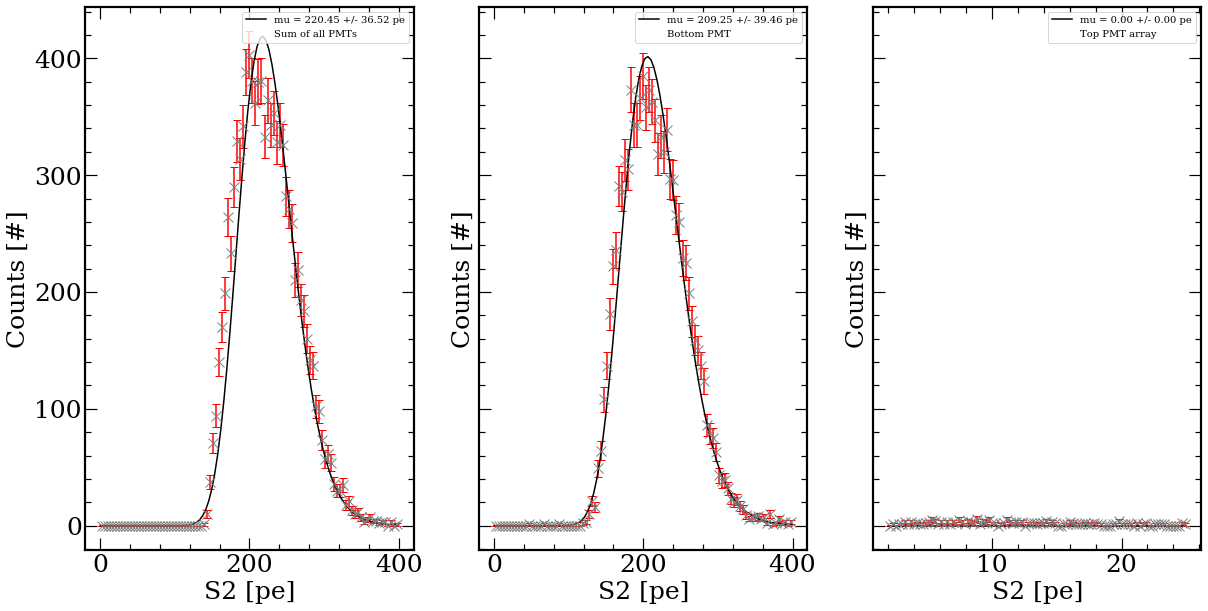

8.678657799416554e-05
220.45148731024116
Bottom PMT sees  0.9999996063234635 % of the light
Bottom PMT sees  0.9492013938203984 % of the light


In [98]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3,figsize=(20,10),sharex=False, sharey=True)

#print(axes)

plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

for ax in [ax1, ax2, ax3]:

        #ax = plt.gca()
        ax.tick_params(axis = 'both')
        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2.2)
        
        ax.xaxis.set_minor_locator(AutoMinorLocator(5)) 
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)
        
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus

p0 = [10,10,10]

x_range_all = np.linspace(0, 400,100)

all_range = np.linspace(0, 400,100)
all_counts, all_binEdges = np.histogram(kr_s1_area_all_corrected, bins=all_range)
all_bincenters = 0.5 * (all_binEdges[1:] + all_binEdges[:-1])

x_range_bot = np.linspace(0, 400,100)

bot_range = np.linspace(0, 400,100)
bot_counts, bot_binEdges = np.histogram(kr_s1_area_bottom_corrected, bins=bot_range)
bot_bincenters = 0.5 * (bot_binEdges[1:] + bot_binEdges[:-1])

x_range_top = np.linspace(2, 25,100)

top_range = np.linspace(2, 25,100)
top_counts, top_binEdges = np.histogram(sum_s1_area_corrected, bins=top_range)
top_bincenters = 0.5 * (top_binEdges[1:] + top_binEdges[:-1])

popt_bot, pcov = curve_fit(single_gaus, bot_bincenters, bot_counts, p0,  sigma=np.maximum(np.sqrt(bot_counts), np.ones_like(bot_counts)))


popt_all, pcov = curve_fit(single_gaus, all_bincenters, all_counts, p0,  sigma=np.maximum(np.sqrt(all_counts), np.ones_like(all_counts)))

popt_top, pcov = curve_fit(single_gaus, top_bincenters, top_counts, p0,  sigma=np.maximum(np.sqrt(top_counts), np.ones_like(top_counts)))
# perr_top = np.sqrt(np.diag(pcov))
# S1_mu_all = popt_all[1]
# S1_mu_all_str = "%.2f" % S1_mu_all
# S1_sigma_all = perr_all[1]
# S1_sigma_all_str = "%.2f" % S1_sigma_all
S1_mu_top = np.exp(popt_top[1]+((popt_top[2]**2)/2))
S1_mu_top_str = "%.2f" % S1_mu_top
S1_sigma_top = np.exp(popt_top[1]+((popt_top[2]**2)/2))    * np.sqrt(np.exp(popt_top[2]**2)-1)
S1_sigma_top_str = "%.2f" % S1_sigma_top

S1_mu_all = np.exp(popt_all[1]+((popt_all[2]**2)/2))
S1_mu_all_str = "%.2f" % S1_mu_all
S1_sigma_all = np.exp(popt_all[1]+((popt_all[2]**2)/2))    * np.sqrt(np.exp(popt_all[2]**2)-1)
S1_sigma_all_str = "%.2f" % S1_sigma_all

S1_mu_bot = np.exp(popt_bot[1]+((popt_bot[2]**2)/2))
S1_mu_bot_str = "%.2f" % S1_mu_bot
S1_sigma_bot = np.exp(popt_bot[1]+((popt_bot[2]**2)/2))    * np.sqrt(np.exp(popt_bot[2]**2)-1)
S1_sigma_bot_str = "%.2f" % S1_sigma_bot

ax1.errorbar(all_bincenters, all_counts, yerr=np.sqrt(all_counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
ax1.plot(x_range_all,single_gaus(x_range_all,*popt_all), color = 'k',label = 'mu = '+str(S1_mu_all_str)+ ' +/- '+str(S1_sigma_all_str)+' pe')
ax1.plot([], [], ' ', label = 'Sum of all PMTs')


ax2.errorbar(bot_bincenters, bot_counts, yerr=np.sqrt(bot_counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
ax2.plot(x_range_bot,single_gaus(x_range_bot,*popt_bot), color = 'k',label = 'mu = '+str(S1_mu_bot_str)+ ' +/- '+str(S1_sigma_bot_str)+' pe')
ax2.plot([], [], ' ', label = 'Bottom PMT')


ax3.errorbar(top_bincenters, top_counts, yerr=np.sqrt(top_counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
ax3.plot(x_range_top,single_gaus(x_range_top,*popt_top), color = 'k',label = 'mu = '+str(S1_mu_top_str)+ ' +/- '+str(S1_sigma_top_str)+' pe')
ax3.plot([], [], ' ', label = 'Top PMT array')



ax1.set_xlabel('S2 [pe]')
ax1.set_ylabel('Counts [#]')
ax1.legend(loc = 1, prop={'size': 10})

ax2.set_xlabel('S2 [pe]')
ax2.set_ylabel('Counts [#]')
ax2.legend(loc = 1, prop={'size': 10})

ax3.set_xlabel('S2 [pe]')
ax3.set_ylabel('Counts [#]')
ax3.legend(loc = 1, prop={'size': 10})
plt.show()

print(S1_mu_top)
print(S1_mu_all)
print('Bottom PMT sees ', 1-(S1_mu_top/S1_mu_all), '% of the light')
print('Bottom PMT sees ', (S1_mu_bot/S1_mu_all), '% of the light')

/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


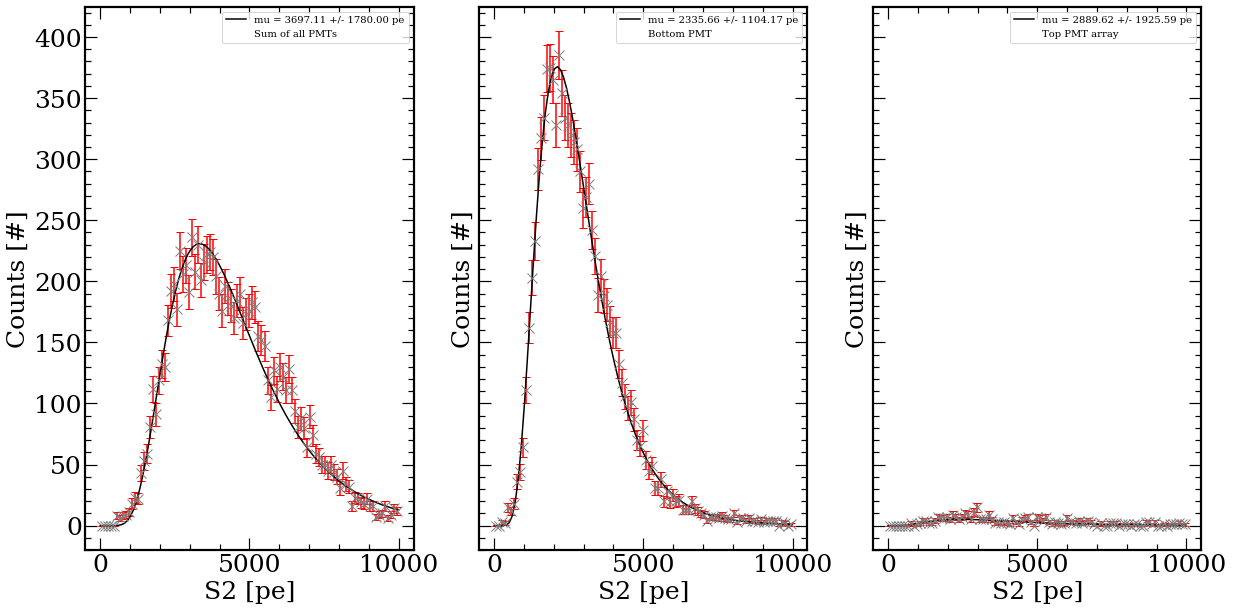

8.678657799416554e-05
220.45148731024116
Bottom PMT sees  0.2184107732651973 % of the light
Bottom PMT sees  0.6317526254195281 % of the light


In [100]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3,figsize=(20,10),sharex=False, sharey=True)

#print(axes)

plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

for ax in [ax1, ax2, ax3]:

        #ax = plt.gca()
        ax.tick_params(axis = 'both')
        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2.2)
        
        ax.xaxis.set_minor_locator(AutoMinorLocator(5)) 
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)
        
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus

p0 = [10,10,10]

x_range_all = np.linspace(0, 10000,100)

all_range = np.linspace(0, 10000,100)
all_counts, all_binEdges = np.histogram(kr_s2_area_all_corrected, bins=all_range)
all_bincenters = 0.5 * (all_binEdges[1:] + all_binEdges[:-1])

x_range_bot = np.linspace(0, 10000,100)

bot_range = np.linspace(0, 10000,100)
bot_counts, bot_binEdges = np.histogram(kr_s2_area_bottom_corrected, bins=bot_range)
bot_bincenters = 0.5 * (bot_binEdges[1:] + bot_binEdges[:-1])

x_range_top = np.linspace(0, 10000,100)

top_range = np.linspace(0, 10000,100)
top_counts, top_binEdges = np.histogram(sum_s2_area_corrected, bins=top_range)
top_bincenters = 0.5 * (top_binEdges[1:] + top_binEdges[:-1])

popt_bot, pcov = curve_fit(single_gaus, bot_bincenters, bot_counts, p0,  sigma=np.maximum(np.sqrt(bot_counts), np.ones_like(bot_counts)))


popt_all, pcov = curve_fit(single_gaus, all_bincenters, all_counts, p0,  sigma=np.maximum(np.sqrt(all_counts), np.ones_like(all_counts)))

popt_top, pcov = curve_fit(single_gaus, top_bincenters, top_counts, p0,  sigma=np.maximum(np.sqrt(top_counts), np.ones_like(top_counts)))
# perr_top = np.sqrt(np.diag(pcov))
# S1_mu_all = popt_all[1]
# S1_mu_all_str = "%.2f" % S1_mu_all
# S1_sigma_all = perr_all[1]
# S1_sigma_all_str = "%.2f" % S1_sigma_all
S2_mu_top = np.exp(popt_top[1]+((popt_top[2]**2)/2))
S2_mu_top_str = "%.2f" % S2_mu_top
S2_sigma_top = np.exp(popt_top[1]+((popt_top[2]**2)/2))    * np.sqrt(np.exp(popt_top[2]**2)-1)
S2_sigma_top_str = "%.2f" % S2_sigma_top

S2_mu_all = np.exp(popt_all[1]+((popt_all[2]**2)/2))
S2_mu_all_str = "%.2f" % S2_mu_all
S2_sigma_all = np.exp(popt_all[1]+((popt_all[2]**2)/2))    * np.sqrt(np.exp(popt_all[2]**2)-1)
S2_sigma_all_str = "%.2f" % S2_sigma_all

S2_mu_bot = np.exp(popt_bot[1]+((popt_bot[2]**2)/2))
S2_mu_bot_str = "%.2f" % S2_mu_bot
S2_sigma_bot = np.exp(popt_bot[1]+((popt_bot[2]**2)/2))    * np.sqrt(np.exp(popt_bot[2]**2)-1)
S2_sigma_bot_str = "%.2f" % S2_sigma_bot

ax1.errorbar(all_bincenters, all_counts, yerr=np.sqrt(all_counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
ax1.plot(x_range_all,single_gaus(x_range_all,*popt_all), color = 'k',label = 'mu = '+str(S2_mu_all_str)+ ' +/- '+str(S2_sigma_all_str)+' pe')
ax1.plot([], [], ' ', label = 'Sum of all PMTs')


ax2.errorbar(bot_bincenters, bot_counts, yerr=np.sqrt(bot_counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
ax2.plot(x_range_bot,single_gaus(x_range_bot,*popt_bot), color = 'k',label = 'mu = '+str(S2_mu_bot_str)+ ' +/- '+str(S2_sigma_bot_str)+' pe')
ax2.plot([], [], ' ', label = 'Bottom PMT')


ax3.errorbar(top_bincenters, top_counts, yerr=np.sqrt(top_counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red',capsize=4)
ax3.plot(x_range_top,single_gaus(x_range_top,*popt_top), color = 'k',label = 'mu = '+str(S2_mu_top_str)+ ' +/- '+str(S2_sigma_top_str)+' pe')
ax3.plot([], [], ' ', label = 'Top PMT array')



ax1.set_xlabel('S2 [pe]')
ax1.set_ylabel('Counts [#]')
ax1.legend(loc = 1, prop={'size': 10})

ax2.set_xlabel('S2 [pe]')
ax2.set_ylabel('Counts [#]')
ax2.legend(loc = 1, prop={'size': 10})

ax3.set_xlabel('S2 [pe]')
ax3.set_ylabel('Counts [#]')
ax3.legend(loc = 1, prop={'size': 10})
plt.show()

print(S1_mu_top)
print(S1_mu_all)
print('Bottom PMT sees ', 1-(S2_mu_top/S2_mu_all), '% of the light')
print('Bottom PMT sees ', (S2_mu_bot/S2_mu_all), '% of the light')